In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

In [44]:
df = pd.read_csv('2013-19.csv', encoding = "ISO-8859-1")
df.head(5)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [46]:
df.columns

Index(['Year', 'MSHA ID', 'Mine Name', 'Mine State', 'Mine County',
       'Mine Status', 'Mine Type', 'Company Type', 'Operation Type',
       'Operating Company', 'Operating Company Address', 'Union Code',
       'Coal Supply Region', 'Production (short tons)', 'Average Employees',
       'Labor Hours'],
      dtype='object')

In [49]:
df['Coal Supply Region'].value_counts()

Appalachia Central     3952
Appalachia Northern    2355
Illinois Basin          604
Appalachia Southern     297
Interior                169
Uinta Region            144
Western                 140
Powder River Basin      117
Name: Coal Supply Region, dtype: int64

In [51]:
a = set()
for i in df['Coal Supply Region']:
    a.add(type(i))

In [52]:
a

{float, str}

In [3]:
df.tail(5)

,Year,MSHA ID,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
7774,2019,3609843,Atlas Anthracite Coal Corporat,Refuse Recovery,Northumberland,Active,Refuse,Indepedent Producer Operator,Mine and Preparation Plant,D. Molesevich & Sons Construct,"P.O. Box 121, Mount Carmel, PA 17851",NaN,Appalachia Northern,443,2,3835
7775,2019,3609178,Rausch Creek Coal Mining Branc,Refuse Recovery,Schuylkill,Temporarily closed,Refuse,Indepedent Producer Operator,Mine only,Rausch Creek Coal Mining Branc,"P.O. Box 8, Williamstown, PA 17098",NaN,Appalachia Northern,11171,12,9245
7776,2019,1103131,Bcr Mine #1,Refuse Recovery,Perry,Active,Refuse,Indepedent Producer Operator,Mine only,"Elk Land Holdings, Llc","2206 Samuel Stuart Ct., Chesterfield, MO 63005",NaN,Illinois Basin,67586,7,14502
7777,2019,1519450,Bmm Refuse No. 1,Refuse Recovery,Pike,"Active, men working, not producing",Refuse,Operating Subsidiary,Mine only,T.L.T. Resources Corp.,"P.O. Box 215, Kimper, KY 41539",NaN,Appalachia Central,26483,11,21466
7778,2019,4407385,Looney Creek,Refuse Recovery,Wise,Permanently abandoned,Refuse,Indepedent Producer Operator,Mine only,Mountain Fuels Inc.,"P.O. Box 749, Abingdon, VA 24212",NaN,Appalachia Central,22939,8,3413


In [4]:
print("Shape of the dataset:",df.shape)

Shape of the dataset: (7779, 16)


In [5]:
df.dtypes

Year                          int64
MSHA ID                       int64
Mine Name                    object
Mine State                   object
Mine County                  object
Mine Status                  object
Mine Type                    object
Company Type                 object
Operation Type               object
Operating Company            object
Operating Company Address    object
Union Code                   object
Coal Supply Region           object
Production (short tons)       int64
Average Employees             int64
Labor Hours                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7779 entries, 0 to 7778
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       7779 non-null   int64 
 1   MSHA ID                    7779 non-null   int64 
 2   Mine Name                  7779 non-null   object
 3   Mine State                 7779 non-null   object
 4   Mine County                7779 non-null   object
 5   Mine Status                7779 non-null   object
 6   Mine Type                  7779 non-null   object
 7   Company Type               7779 non-null   object
 8   Operation Type             7779 non-null   object
 9   Operating Company          7779 non-null   object
 10  Operating Company Address  7779 non-null   object
 11  Union Code                 1924 non-null   object
 12  Coal Supply Region         7778 non-null   object
 13  Production (short tons)    7779 non-null   int64 
 14  Average 

In [7]:
df.describe()

,Year,MSHA ID,Production (short tons),Average Employees,Labor Hours
count,7779.000000,7.779000e+03,7.779000e+03,7779.000000,7.779000e+03
mean,2015.660753,3.057499e+06,7.516752e+05,55.602391,1.230532e+05
std,2.022938,1.434235e+06,4.473642e+06,119.079942,2.681179e+05
min,2013.000000,1.003290e+05,0.000000e+00,0.000000,8.000000e+00
25%,2014.000000,1.519165e+06,0.000000e+00,6.000000,8.801000e+03
50%,2015.000000,3.608273e+06,3.087000e+04,16.000000,3.105000e+04
75%,2017.000000,4.407308e+06,2.280785e+05,44.000000,1.009000e+05
max,2019.000000,5.000030e+06,1.179655e+08,1628.000000,3.349283e+06


In [8]:
df.isnull().sum()

Year                            0
MSHA ID                         0
Mine Name                       0
Mine State                      0
Mine County                     0
Mine Status                     0
Mine Type                       0
Company Type                    0
Operation Type                  0
Operating Company               0
Operating Company Address       0
Union Code                   5855
Coal Supply Region              1
Production (short tons)         0
Average Employees               0
Labor Hours                     0
dtype: int64

In [9]:
#take a peek on what is in each colume
print("Checking Unique values\n")
print("Mine County : \n",df['Mine County'].unique(),"\n")
print("Mine Status : \n",df['Mine Status'].unique(),"\n")
print("Mine Type : \n",df['Mine Type'].unique(),"\n")
print("Company Type : \n",df['Company Type'].unique(),"\n")
print("Operating Company : \n",df['Operating Company'].unique(),"\n")
print("Union Code : \n",df['Union Code'].unique(),"\n")
print("Company Type : \n",df['Company Type'].unique(),"\n")

Checking Unique values

Mine County : 
 ['Bibb' 'Blount' 'Fayette' 'Franklin' 'Jackson' 'Jefferson' 'Shelby'
 'Tuscaloosa' 'Walker' 'Winston' 'Fairbanks North Star' 'Navajo'
 'Sebastian' 'Delta' 'Gunnison' 'La Plata' 'Las Animas' 'Moffat'
 'Montrose' 'Rio Blanco' 'Routt' 'Gallatin' 'Hamilton' 'Macoupin'
 'Montgomery' 'Perry' 'Randolph' 'St Clair' 'Saline' 'Sangamon' 'Wabash'
 'Washington' 'White' 'Williamson' 'Clay' 'Daviess' 'Dubois' 'Gibson'
 'Greene' 'Knox' 'Pike' 'Sullivan' 'Vigo' 'Warrick' 'Bourbon' 'Bell'
 'Boyd' 'Breathitt' 'Elliott' 'Floyd' 'Harlan' 'Henderson' 'Hopkins'
 'Johnson' 'Knott' 'Laurel' 'Lawrence' 'Leslie' 'Letcher' 'Livingston'
 'Mclean' 'Magoffin' 'Martin' 'Muhlenberg' 'Ohio' 'Rockcastle' 'Union'
 'Webster' 'Whitley' 'De Soto' 'Natchitoches' 'Allegany' 'Garrett'
 'Choctaw' 'Kemper' 'Bates' 'Big Horn' 'Musselshell' 'Richland' 'Rosebud'
 'Mckinley' 'San Juan' 'Mercer' 'Oliver' 'Belmont' 'Carroll' 'Columbiana'
 'Coshocton' 'Guernsey' 'Harrison' 'Mahoning' 'Monroe' 'M

## Replacing the mispelling of the value indepedent in Company Type

In [10]:
df['Company Type'].replace(to_replace='Indepedent Producer Operator', 
                            value = 'Independent Producer Operator', inplace=True)

In [11]:
df.dtypes

Year                          int64
MSHA ID                       int64
Mine Name                    object
Mine State                   object
Mine County                  object
Mine Status                  object
Mine Type                    object
Company Type                 object
Operation Type               object
Operating Company            object
Operating Company Address    object
Union Code                   object
Coal Supply Region           object
Production (short tons)       int64
Average Employees             int64
Labor Hours                   int64
dtype: object

## Renaming columns by underscore to remove the spaces between the Column names

In [12]:
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True) 
df.head()

,Year,MSHA_ID,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'MSHA_ID'}>],
       [<AxesSubplot:title={'center':'Production_(short_tons)'}>,
        <AxesSubplot:title={'center':'Average_Employees'}>],
       [<AxesSubplot:title={'center':'Labor_Hours'}>, <AxesSubplot:>]],
      dtype=object)

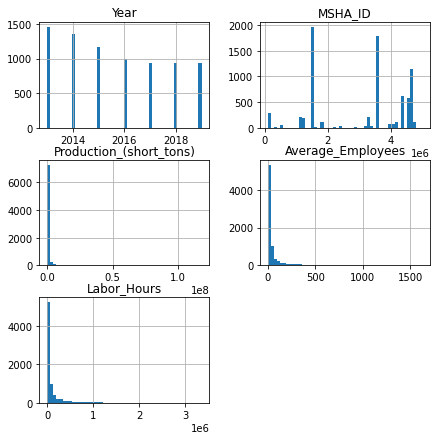

In [13]:
df.hist(bins=50,figsize=(7,7))

In [14]:
correlation = df.corr()['Production_(short_tons)']
correlation

Year                       0.007643
MSHA_ID                    0.065722
Production_(short_tons)    1.000000
Average_Employees          0.706158
Labor_Hours                0.670748
Name: Production_(short_tons), dtype: float64

In [15]:
correlation = df.corr()
correlation

,Year,MSHA_ID,Production_(short_tons),Average_Employees,Labor_Hours
Year,1.000000,0.015827,0.007643,0.004453,0.007087
MSHA_ID,0.015827,1.000000,0.065722,0.024573,0.015335
Production_(short_tons),0.007643,0.065722,1.000000,0.706158,0.670748
Average_Employees,0.004453,0.024573,0.706158,1.000000,0.994212
Labor_Hours,0.007087,0.015335,0.670748,0.994212,1.000000


<AxesSubplot:>

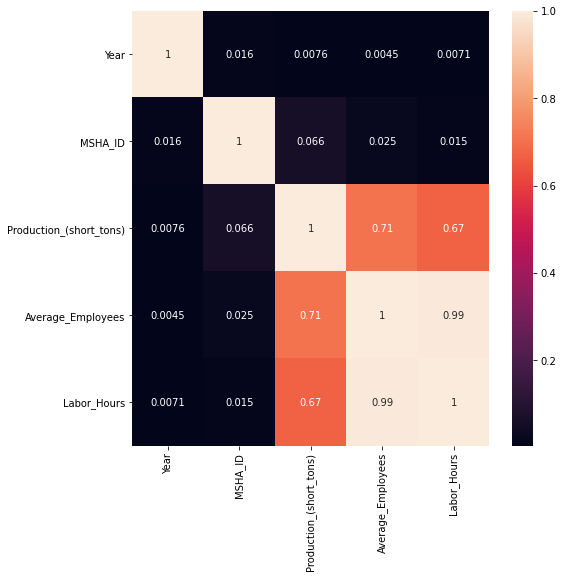

In [16]:
fig  = plt.subplots(figsize=(8,8))
sns.heatmap(correlation,annot=True)

Text(0, 0.5, 'Total Number of Hours worked')

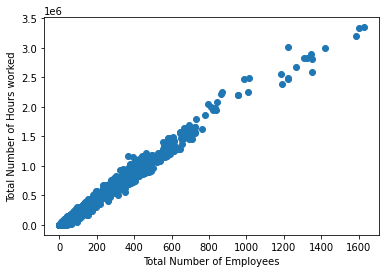

In [17]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel('Total Number of Employees')
plt.ylabel('Total Number of Hours worked')

### We used basic scatter plot to show the relationship between Employees vs Number of Hours Work. Here we can see that as the
### number of emplyees goes up, the total number of hours worked increases at the mines in a linear relationship.

/Users/sc47/programs/main/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average_Employees', ylabel='Labor_Hours'>

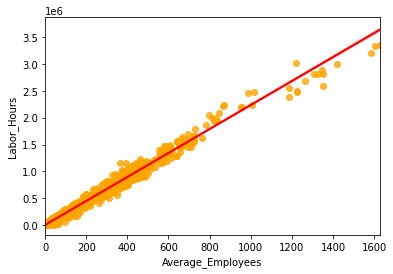

In [18]:
#using seaborn regression plot
sns.regplot(df.Average_Employees, df.Labor_Hours, ci=95, n_boot=1000,scatter_kws={"color": "orange"}, line_kws={"color": "red"})

### Here using seaborn we showed the same trend, but by fitting a line in the data which gave it a bootstrapping in the middle of the line.

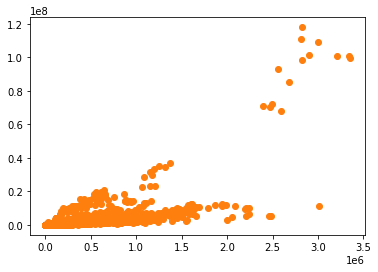

In [19]:
plt.scatter(df.Labor_Hours, df['Production_(short_tons)'], color='#ff7f0e')

<AxesSubplot:>

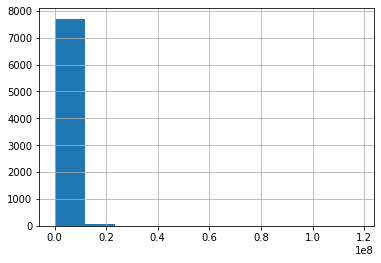

In [20]:
df['Production_(short_tons)'].hist(bins=10)

In [21]:
#wanted to see the minimum value
min(df['Production_(short_tons)'])

0

In [22]:
#look at where the production shorttons is eqaul to zero
df['Production_(short_tons)'] == 0

#where is the production equal to zero
df[df['Production_(short_tons)'] == 0]

,Year,MSHA_ID,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
6,2013,100329,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",UNIT,Appalachia Southern,0,59,144002
8,2013,102901,Shoal Creek Mine,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Mine and Preparation Plant,Drummond Company Inc,"P.O. Box 1549, Jasper, AL 35501",United Mine Workers of America,Appalachia Southern,0,5,12396
18,2013,102976,Piney Woods Preparation Plant,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,0,5,14828
19,2013,102976,Piney Woods Preparation Plant,Alabama,Shelby,Active,Underground,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,0,9,23193
20,2013,103380,Calera,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,Conrad Yelvington Distributors,"13101 Telecom Dr #101, Tampa, FL 33637",,Appalachia Southern,0,6,12621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,2019,4604637,Kepler No. 1 Prep Plant,West Virginia (Southern),Wyoming,Active,Underground,Operating Subsidiary,Preparation Plant,Kepler Processing Company Llc,"P.O. Box 1050, Pineville, WV 24874",United Mine Workers Of America,Appalachia Central,0,6,11689
7740,2019,4605868,Ranger Fuel Preparation Plant,West Virginia (Southern),Wyoming,Active,Surface,Operating Subsidiary,Preparation Plant,Bluestone Oil Corp.,"P.O. Box 338, Pineville, WV 24874",United Mine Workers Of America,Appalachia Central,0,3,7315
7741,2019,4605868,Ranger Fuel Preparation Plant,West Virginia (Southern),Wyoming,Active,Underground,Operating Subsidiary,Preparation Plant,Bluestone Oil Corp.,"P.O. Box 338, Pineville, WV 24874",United Mine Workers Of America,Appalachia Central,0,8,17070
7746,2019,4609316,K-2 Plant,West Virginia (Southern),Wyoming,Active,Surface,Independent Producer Operator,Preparation Plant,Nufac Mining Company Inc,"P.O. Box 1085, Beckley, WV 25802",NaN,Appalachia Central,0,4,11299


### There are quite a number of mines that had no production values. Next trying to look at the mines that produced at least 1 tons or more.

## Slicing the Data

In [23]:
#where is the production is at least 1 tonne
df = df[df['Production_(short_tons)'] >1 ]
df.head()

,Year,MSHA_ID,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393


In [24]:
len(df)

5637

<AxesSubplot:>

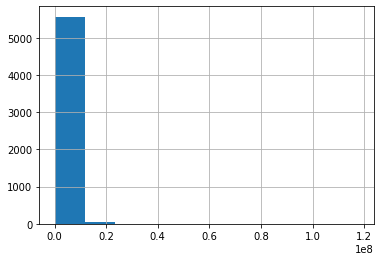

In [25]:
df['Production_(short_tons)'].hist(bins=10)

Still a skewed distribution...Need to standardize/normalize the data by taking the log

In [26]:
#create a new column "log_production"
df["log_production"]= np.log(df['Production_(short_tons)'])

<AxesSubplot:>

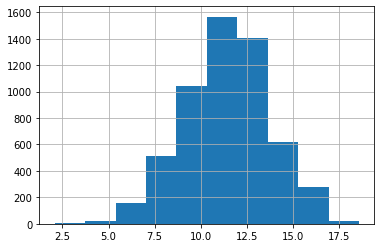

In [27]:
df.log_production.hist()

close to a log normal distribution, thus the production of coal mines follows a log normal distribution. I will stick with this as my prediction variable.

In [28]:
#May be predictive variable: A good predictor in how productive the mine is.
df.Mine_Status.unique()

array(['Active, men working, not producing', 'Permanently abandoned',
       'Active', 'Temporarily closed', 'New, under construction'],
      dtype=object)

In [29]:
df[['Mine_Status','Production_(short_tons)']].groupby('Mine_Status').mean()

,Production_(short_tons)
Mine_Status,
Active,1.412535e+06
"Active, men working, not producing",1.963681e+05
"New, under construction",5.406550e+04
Permanently abandoned,7.811462e+04
Temporarily closed,4.009091e+04


In [30]:
df[['Mine_Status','log_production']].groupby('Mine_Status').mean()

,log_production
Mine_Status,
Active,11.913924
"Active, men working, not producing",10.726091
"New, under construction",9.591947
Permanently abandoned,10.136924
Temporarily closed,9.218022


## Predict the production of coal mines in 2015
What caused high or lower production

### Feature Engineering

In [31]:
for columns in df:
    print(columns)

Year
MSHA_ID
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


In [32]:
df.Union_Code.unique()

array([' ', 'UNIT', 'United Mine Workers of America', 'INTE',
       'International Union of Operation Engineers',
       'Scotia Employees Association', 'Western Energy Workers', nan,
       'United Mine Workers Of America',
       'International Brotherhood Of Teamsters, Chauffeurs, Warehouse',
       'International Union Of Operation Engineers',
       'International Brotherhood Of Electrical Workers',
       'Utility Workers Of America'], dtype=object)

Of the above features on two are number: labour hours and Average_employee--Split into numerical features; and categorical variables

In [33]:
features =["Average_Employees",
            "Labor_Hours" ,
              ]

categoricals = ['Mine_State',
               'Mine_County',
               'Mine_Status',
               'Mine_Type',
               "Company_Type",
               "Operation_Type",
               "Union_Code",
               "Coal_Supply_Region",
                      ]
           
df.target = ['log_production'] 

<ipython-input-33-53ea31ff1773>:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target = ['log_production']


## What is the relationship between Mine_Status and log_production?

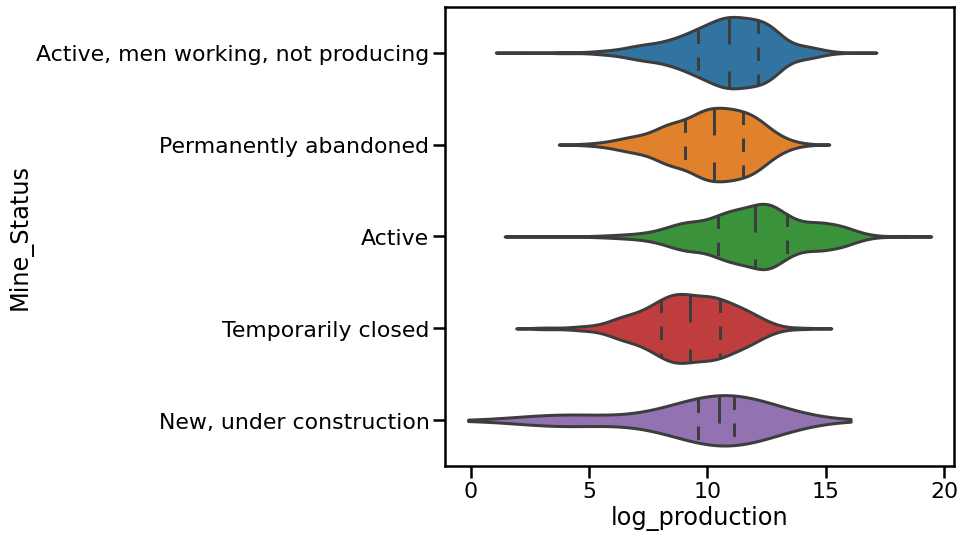

In [34]:
#fig = plt.sublots(figsize = (14,8))
plt.figure(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Mine_Status", x = "log_production", data=df,
              inplace =True, inner ="quartile")
plt.tight_layout()

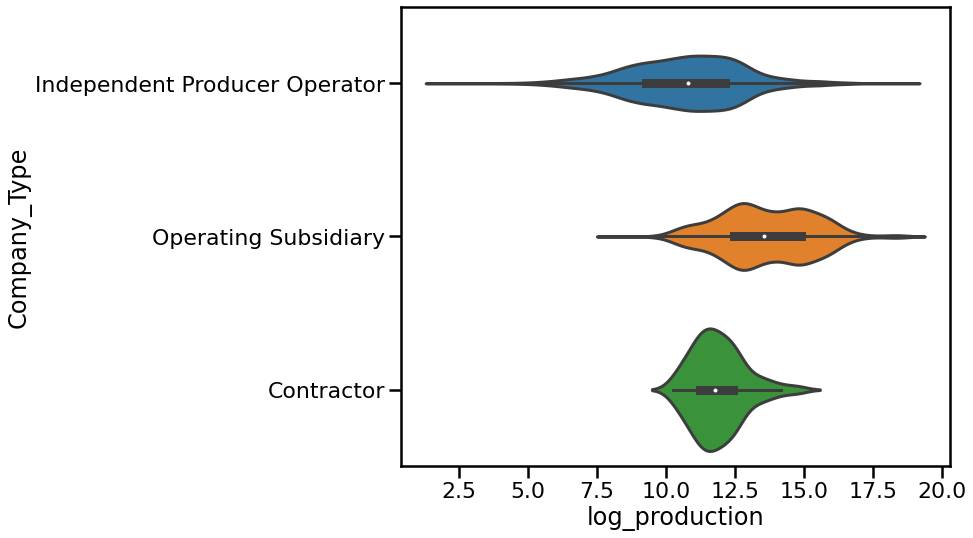

In [35]:
plt.figure(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Company_Type", x = "log_production", data=df,
              inplace =True, inner ="box", )
plt.tight_layout()

In [36]:
pd.get_dummies(df["Company_Type"]).sample(50).head()

,Contractor,Independent Producer Operator,Operating Subsidiary
3643,0,0,1
3224,0,0,1
5902,0,0,1
265,0,1,0
4369,0,1,0


In [37]:
categoricals

['Mine_State',
 'Mine_County',
 'Mine_Status',
 'Mine_Type',
 'Company_Type',
 'Operation_Type',
 'Union_Code',
 'Coal_Supply_Region']

In [38]:
# df.loc[df['Coal_Supply_Region'] != str]['Coal_Supply_Region']

In [42]:
df.isnull().sum()

Year                                          0
MSHA_ID                                       0
Mine_Name                                     0
Mine_State                                    0
Mine_County                                   0
                                             ..
Company_Type_Contractor                       0
Company_Type_Independent Producer Operator    0
Company_Type_Operating Subsidiary             0
Operation_Type_Mine and Preparation Plant     0
Operation_Type_Mine only                      0
Length: 234, dtype: int64

In [43]:
for i in df['Coal_Supply_Region']:
#     if type(i) != str:
#         print(i)
#     print(type(i) == str)
    if type(i) == float:
        print(i)

nan


In [41]:
#convert cetegorical varables into dummy numeric variables
dummy_categoricals = []
for categorical in categoricals:
    print(categorical, len(df[categorical].unique()))
    # Avoid the dummy trap variable
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical], prefix=categorical)
    #concanate
    df = pd.concat([df, temp_df],axis =1)
    temp_df.drop("_".join([categorical,str(drop_var)]), axis =1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

Mine_State 29
Mine_County 175
Mine_Status 5
Mine_Type 3
Company_Type 3
Operation_Type 2
Union_Code 13


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
dummy_categoricals[:10]

# Build our Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
len(dummy_categoricals)

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

In [ ]:
target=df.log_production

In [ ]:
model = RandomForestRegressor(n_estimators=100, oob_score=True)
model.fit(train[features + dummy_categoricals],train[target])